--- 

# Aprendizaje de Máquina sobre la Flor Iris

En este notebook realizaremos una tarea de clasificación sobre el dataset Iris utilizando algunos algoritmos populares de aprendizaje de máquina.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Lectura Datos

In [4]:
#from sklearn.datasets import load_dataset
#iris_data = load_dataset("iris")

#import seaborn as sns
#iris_data = sns.load_dataset("iris")

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [6]:
dataset = pd.read_csv(url, names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width','class'])

In [8]:
type(dataset)
#dataset.info()

pandas.core.frame.DataFrame

### Analisis Exploratorio

In [11]:
dataset.shape

(150, 5)

In [13]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [19]:
dataset.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

### Análisis Visual

In [22]:
import seaborn as sns

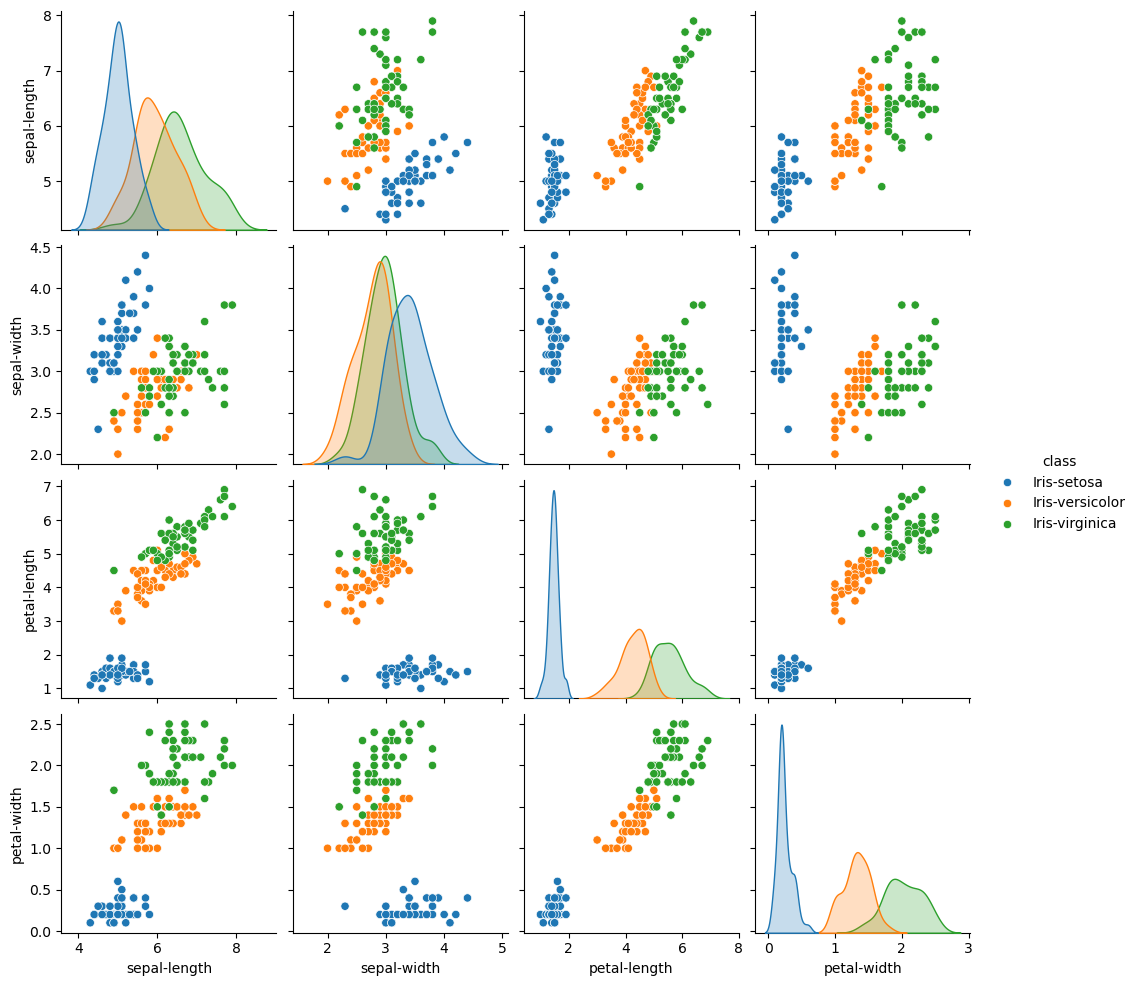

In [23]:
sns.pairplot(dataset, hue='class')

<Axes: >

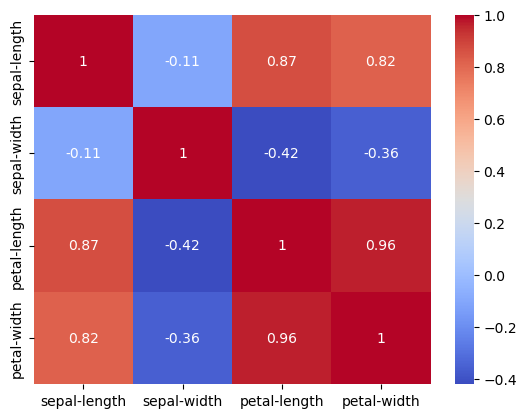

In [26]:
#sns.heatmap( dataset.corr(), annot=True, cmap='coolwarm' )

# Seleccionar solo columnas numericas
numeric_columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']
#sepal-length	sepal-width	petal-length	petal-width
numeric_data = dataset[numeric_columns]

# Calcular matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

/var/folders/z7/s8_bm31j1vqbws7fljh6p4xw0000gn/T/ipykernel_60015/1142157264.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( dataset['sepal-length'] )


<Axes: xlabel='sepal-length', ylabel='Density'>

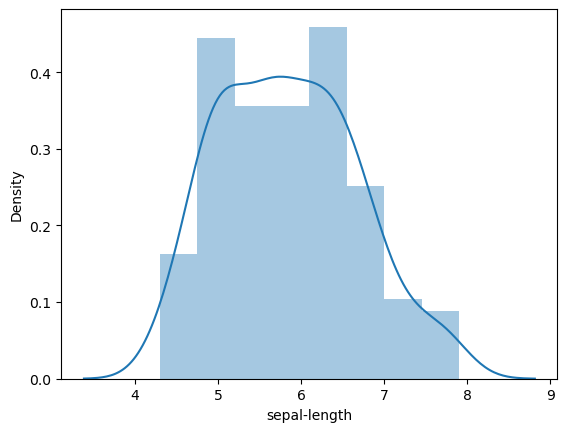

In [28]:
sns.distplot( dataset['sepal-length'] )

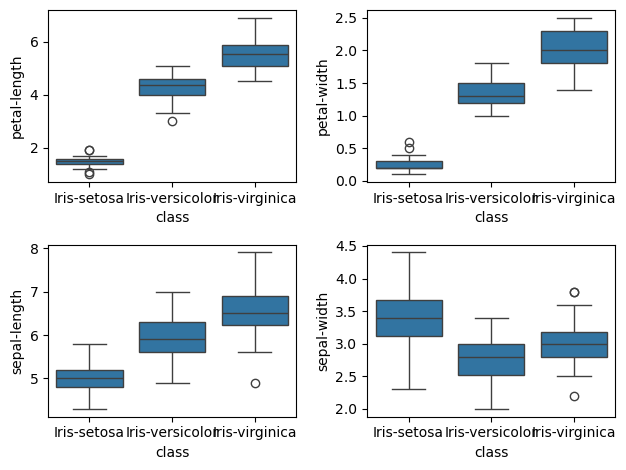

In [30]:
plt.subplot(2,2,1)
sns.boxplot(data=dataset, x='class', y='petal-length')
plt.subplot(2,2,2)
sns.boxplot(data=dataset, x='class', y='petal-width')
plt.subplot(2,2,3)
sns.boxplot(data=dataset, x='class', y='sepal-length')
plt.subplot(2,2,4)
sns.boxplot(data=dataset, x='class', y='sepal-width')
plt.tight_layout()

<Axes: xlabel='class', ylabel='petal-length'>

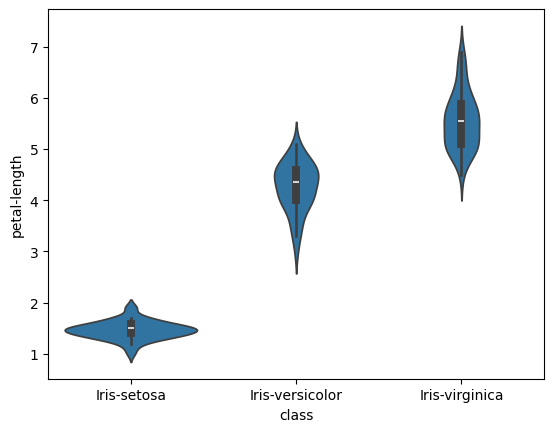

In [32]:
sns.violinplot(data=dataset, x='class', y='petal-length')

## Entrenamiento de algoritmos

In [35]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [37]:
# Dividir el set de entrenamiento en Trainingg set y Test set
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Regresión Logística

In [42]:
from sklearn.linear_model import LogisticRegression

In [44]:
classifier = LogisticRegression(random_state=0)

In [46]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [48]:
# una predicción
t = [[5.1, 3.5, 1.4, 0.2]]
classifier.predict(t)

array(['Iris-setosa'], dtype=object)

In [50]:
y_pred = classifier.predict(X_test)

In [52]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [54]:
y_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [58]:
print( confusion_matrix(y_test, y_pred) )

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [60]:
print(accuracy_score(y_test, y_pred))

0.9736842105263158


In [62]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



#### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
classifier = RandomForestClassifier(n_estimators=300, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [69]:
print( confusion_matrix(y_test, y_pred) )
print('\n')
print(accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


0.9736842105263158


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



#### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

# prediciendo el test set
y_pred = classifier.predict(X_test)

# viendo el desempeño
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Accuracy:",accuracy_score(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


Accuracy: 0.9736842105263158


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



#### Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# prediciendo el test set
y_pred = classifier.predict(X_test)

# viendo el desempeño
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


Accuracy: 1.0


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

